# Exploratory Data Analysis and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.concat([pd.read_csv('player_data_190.csv'), pd.read_csv('player_data.csv')], ignore_index=True, axis=0)
df.head()

,Unnamed: 0,Name,Age,Nationality,Height,Weight,Team,Skill,Pot,Current_Fee,...,Offsides,Ball_Recoveries,Ball_Recoveries_Opponent,Challenges,Air_Challenges,Tackles,Ball_Interceptions,Lost_Balls,Lost_Balls_Own,Errors_to_Goal
0,0,Kylian Mbappé,24,FRA,178,75,PSG,90.2,99.5,136M,...,42,25,12,631.0,27,32,28,413,33,0
1,1,Erling Haaland,22,NOR,195,88,Man City,92.0,100.0,133.6M,...,11,22,14,482.0,170,27,39,243,42,1
2,2,Vinicius Junior,22,BRA,176,73,Real Madrid,82.7,94.9,113.8M,...,27,50,26,883.0,31,101,53,501,55,1
3,3,Phil Foden,23,ENG,171,70,Man City,91.1,100.0,103.7M,...,8,45,13,341.0,58,41,58,192,23,0
4,4,Jude Bellingham,19,ENG,186,75,Dortmund,71.8,98.3,100M,...,3,140,57,774.0,117,126,196,325,58,3


In [3]:
df.shape

(22953, 38)

In [4]:
df.shape[0] * df.shape[1]

872214

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22953 entries, 0 to 22952
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                22953 non-null  int64  
 1   Name                      22953 non-null  object 
 2   Age                       22953 non-null  int64  
 3   Nationality               22896 non-null  object 
 4   Height                    22953 non-null  int64  
 5   Weight                    22953 non-null  int64  
 6   Team                      22953 non-null  object 
 7   Skill                     22953 non-null  float64
 8   Pot                       22953 non-null  float64
 9   Current_Fee               22953 non-null  object 
 10  Highest_xTV               22953 non-null  object 
 11  num_trophies              22953 non-null  int64  
 12  Preferred_foot            20015 non-null  object 
 13  Best_Playing_Role         16514 non-null  object 
 14  Season

In [6]:
df = df.fillna({'Best_Playing_Role': 'Not Specified', 'Preferred_foot': 'Not Specified'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22953 entries, 0 to 22952
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                22953 non-null  int64  
 1   Name                      22953 non-null  object 
 2   Age                       22953 non-null  int64  
 3   Nationality               22896 non-null  object 
 4   Height                    22953 non-null  int64  
 5   Weight                    22953 non-null  int64  
 6   Team                      22953 non-null  object 
 7   Skill                     22953 non-null  float64
 8   Pot                       22953 non-null  float64
 9   Current_Fee               22953 non-null  object 
 10  Highest_xTV               22953 non-null  object 
 11  num_trophies              22953 non-null  int64  
 12  Preferred_foot            22953 non-null  object 
 13  Best_Playing_Role         22953 non-null  object 
 14  Season

In [8]:
df = df.dropna(subset=['Nationality'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22896 entries, 0 to 22952
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                22896 non-null  int64  
 1   Name                      22896 non-null  object 
 2   Age                       22896 non-null  int64  
 3   Nationality               22896 non-null  object 
 4   Height                    22896 non-null  int64  
 5   Weight                    22896 non-null  int64  
 6   Team                      22896 non-null  object 
 7   Skill                     22896 non-null  float64
 8   Pot                       22896 non-null  float64
 9   Current_Fee               22896 non-null  object 
 10  Highest_xTV               22896 non-null  object 
 11  num_trophies              22896 non-null  int64  
 12  Preferred_foot            22896 non-null  object 
 13  Best_Playing_Role         22896 non-null  object 
 14  Season

In [10]:
df[(df['Height'] == 0) | (df['Weight'] == 0)].shape

(6212, 38)

In [11]:
df[df['Age'] == 0].shape

(6, 38)

In [12]:
df = df.drop(df[df['Age'] == 0].index)

In [13]:
df[df['Age'] == 0].shape

(0, 38)

In [14]:
df[(df['Skill'] == 0) | (df['Pot'] == 0)].shape

(304, 38)

In [15]:
df = df[~((df['Skill'] == 0) | (df['Pot'] == 0))]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22586 entries, 0 to 22952
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                22586 non-null  int64  
 1   Name                      22586 non-null  object 
 2   Age                       22586 non-null  int64  
 3   Nationality               22586 non-null  object 
 4   Height                    22586 non-null  int64  
 5   Weight                    22586 non-null  int64  
 6   Team                      22586 non-null  object 
 7   Skill                     22586 non-null  float64
 8   Pot                       22586 non-null  float64
 9   Current_Fee               22586 non-null  object 
 10  Highest_xTV               22586 non-null  object 
 11  num_trophies              22586 non-null  int64  
 12  Preferred_foot            22586 non-null  object 
 13  Best_Playing_Role         22586 non-null  object 
 14  Season

In [17]:
df[((df['Current_Fee'] == 0) | (df['Highest_xTV'] == 0))].shape

(0, 38)

In [18]:
df.head()

,Unnamed: 0,Name,Age,Nationality,Height,Weight,Team,Skill,Pot,Current_Fee,...,Offsides,Ball_Recoveries,Ball_Recoveries_Opponent,Challenges,Air_Challenges,Tackles,Ball_Interceptions,Lost_Balls,Lost_Balls_Own,Errors_to_Goal
0,0,Kylian Mbappé,24,FRA,178,75,PSG,90.2,99.5,136M,...,42,25,12,631.0,27,32,28,413,33,0
1,1,Erling Haaland,22,NOR,195,88,Man City,92.0,100.0,133.6M,...,11,22,14,482.0,170,27,39,243,42,1
2,2,Vinicius Junior,22,BRA,176,73,Real Madrid,82.7,94.9,113.8M,...,27,50,26,883.0,31,101,53,501,55,1
3,3,Phil Foden,23,ENG,171,70,Man City,91.1,100.0,103.7M,...,8,45,13,341.0,58,41,58,192,23,0
4,4,Jude Bellingham,19,ENG,186,75,Dortmund,71.8,98.3,100M,...,3,140,57,774.0,117,126,196,325,58,3


In [19]:
counts = df['Team'].value_counts()

# Identify least populated classes
least_populated_classes = counts[counts < 2].index.tolist()

len(least_populated_classes)

117

In [20]:
df = df[~df['Team'].isin(least_populated_classes)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22469 entries, 0 to 22952
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                22469 non-null  int64  
 1   Name                      22469 non-null  object 
 2   Age                       22469 non-null  int64  
 3   Nationality               22469 non-null  object 
 4   Height                    22469 non-null  int64  
 5   Weight                    22469 non-null  int64  
 6   Team                      22469 non-null  object 
 7   Skill                     22469 non-null  float64
 8   Pot                       22469 non-null  float64
 9   Current_Fee               22469 non-null  object 
 10  Highest_xTV               22469 non-null  object 
 11  num_trophies              22469 non-null  int64  
 12  Preferred_foot            22469 non-null  object 
 13  Best_Playing_Role         22469 non-null  object 
 14  Season

In [21]:
# Function to plot distributions.
def plot_dist(df, col_name):
    plt.hist(df[col_name], bins=10, edgecolor='black')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.title(f'{col_name} Distribution')
    plt.show()

## EDA

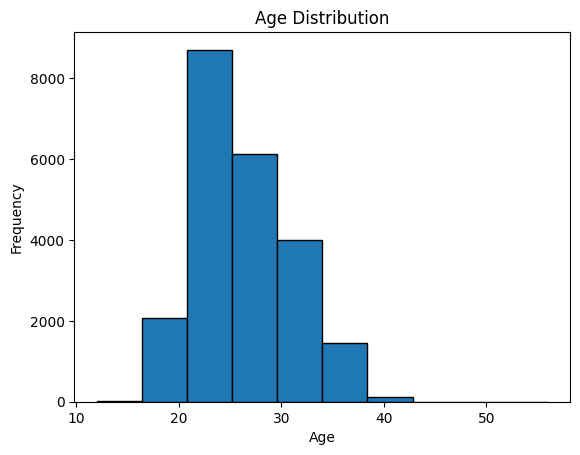

In [22]:
plot_dist(df, 'Age')

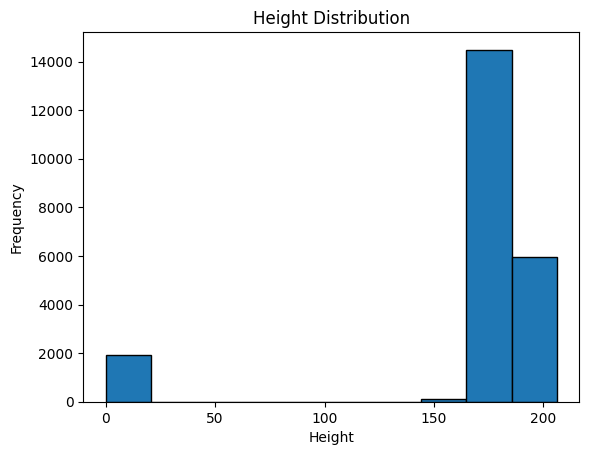

In [23]:
plot_dist(df, 'Height')

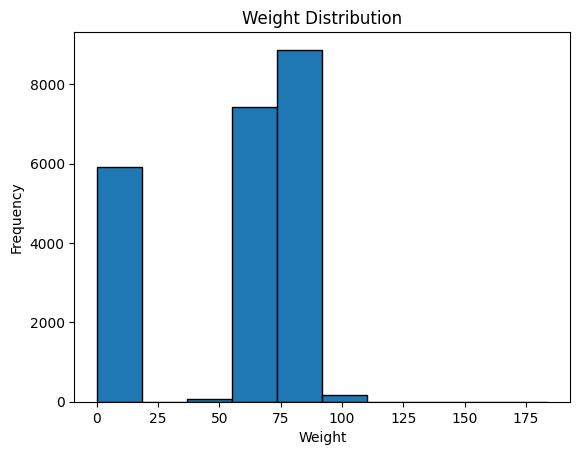

In [24]:
plot_dist(df, 'Weight')

In [25]:
copy = df.copy()
df['Height'] = df['Height'].replace(0, df['Height'].mean())
df['Weight'] = df['Weight'].replace(0, df['Weight'].mean())

In [26]:
df[(df['Height'] == 0) | (df['Weight'] == 0)].shape

(0, 38)

In [27]:
# Create a mask for rows where 'col_name' ends with 'M'
mask_M = df['Current_Fee'].str.endswith('M')
# For 'M' rows, remove the 'M', convert to float and multiply by 1,000,000
df.loc[mask_M, 'Current_Fee'] = df.loc[mask_M, 'Current_Fee'].str.rstrip('M').astype(float) * 1_000_000

mask_K = df['Current_Fee'].str.endswith('K')
mask_K = mask_K.fillna(False)
# For 'M' rows, remove the 'M', convert to float and multiply by 1,000,000
df.loc[mask_K, 'Current_Fee'] = df.loc[mask_K, 'Current_Fee'].str.rstrip('K').astype(float) * 1_000

df.head()

,Unnamed: 0,Name,Age,Nationality,Height,Weight,Team,Skill,Pot,Current_Fee,...,Offsides,Ball_Recoveries,Ball_Recoveries_Opponent,Challenges,Air_Challenges,Tackles,Ball_Interceptions,Lost_Balls,Lost_Balls_Own,Errors_to_Goal
0,0,Kylian Mbappé,24,FRA,178.0,75.0,PSG,90.2,99.5,136000000.0,...,42,25,12,631.0,27,32,28,413,33,0
1,1,Erling Haaland,22,NOR,195.0,88.0,Man City,92.0,100.0,133600000.0,...,11,22,14,482.0,170,27,39,243,42,1
2,2,Vinicius Junior,22,BRA,176.0,73.0,Real Madrid,82.7,94.9,113800000.0,...,27,50,26,883.0,31,101,53,501,55,1
3,3,Phil Foden,23,ENG,171.0,70.0,Man City,91.1,100.0,103700000.0,...,8,45,13,341.0,58,41,58,192,23,0
4,4,Jude Bellingham,19,ENG,186.0,75.0,Dortmund,71.8,98.3,100000000.0,...,3,140,57,774.0,117,126,196,325,58,3


In [28]:
mask_M = df['Highest_xTV'].str.endswith('M')
# For 'M' rows, remove the 'M', convert to float and multiply by 1,000,000
df.loc[mask_M, 'Highest_xTV'] = df.loc[mask_M, 'Highest_xTV'].str.rstrip('M').astype(float) * 1_000_000

mask_K = df['Highest_xTV'].str.endswith('K')
mask_K = mask_K.fillna(False)
# For 'M' rows, remove the 'M', convert to float and multiply by 1,000,000
df.loc[mask_K, 'Highest_xTV'] = df.loc[mask_K, 'Highest_xTV'].str.rstrip('K').astype(float) * 1_000

df['Highest_xTV'].head()

0    162500000.0
1    150000000.0
2    129100000.0
3    138600000.0
4    100000000.0
Name: Highest_xTV, dtype: object

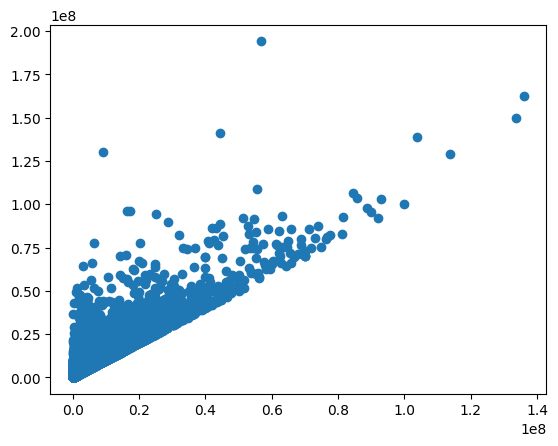

In [29]:
# Positive correlation between feature and the target.
plt.scatter(df['Current_Fee'], df['Highest_xTV'])

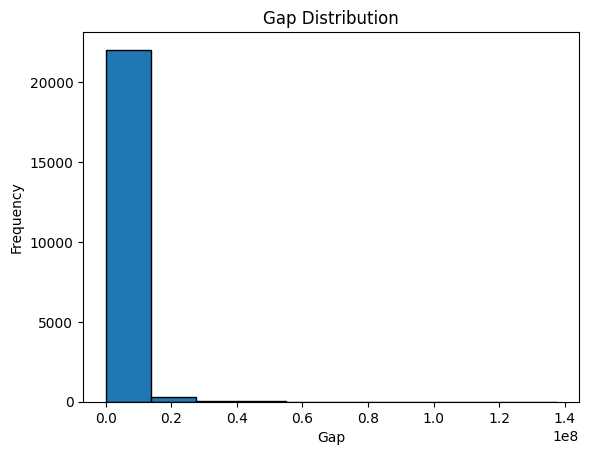

In [30]:
gap = df['Highest_xTV'] - df['Current_Fee']
plt.hist(gap, bins=10, edgecolor='black')
plt.xlabel('Gap')
plt.ylabel('Frequency')
plt.title('Gap Distribution')
plt.show()

In [31]:
# Median of the gap between Current_Fee and Highest_xTV
gap.median()

200000.0

In [32]:
# Number of nationalities in the df
len(df['Nationality'].unique())

156

In [33]:
# Number of teams in the df
len(df['Team'].unique())

1114

In [34]:
# Function to plot Groupby plots.
def groupby_plot(df, col1, col2):
    team_skill = df.groupby(col1)[col2].mean().sort_values(ascending=False).head(20)
    team_skill.plot(kind='bar', figsize=(10, 6))

    plt.xlabel(col1)
    plt.ylabel(f'Mean {col2}')
    plt.title(f'Mean Player {col2} by {col1}')
    plt.show()

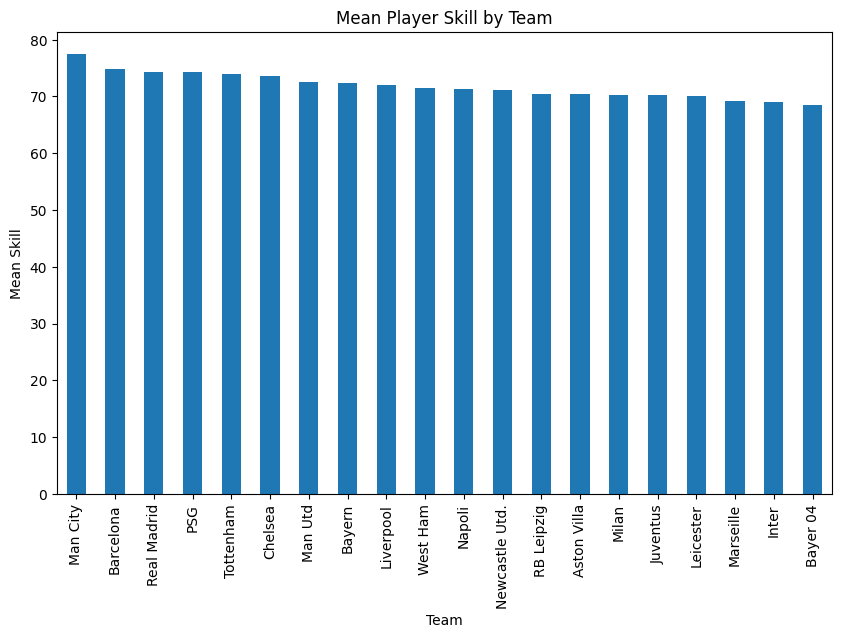

In [35]:
groupby_plot(df, 'Team', 'Skill')

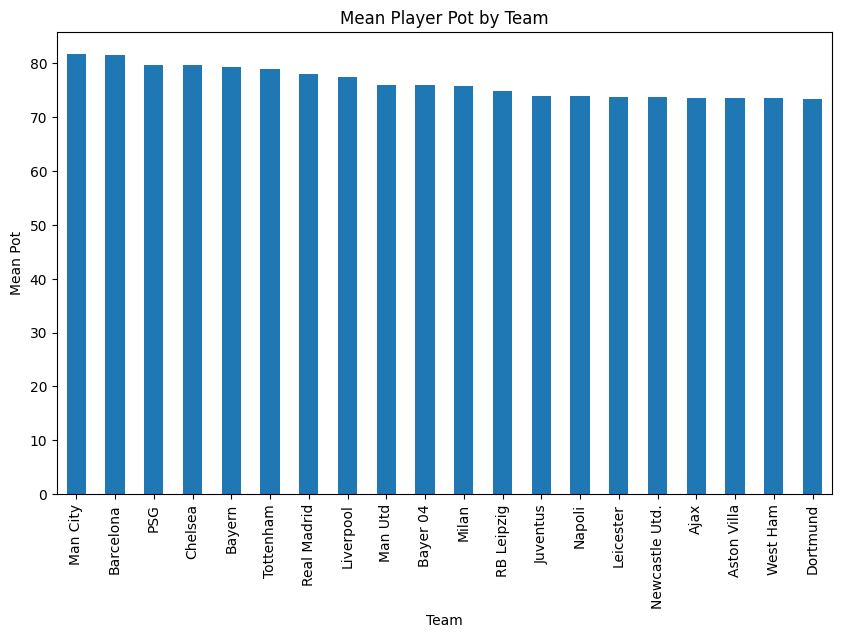

In [36]:
groupby_plot(df, 'Team', 'Pot')

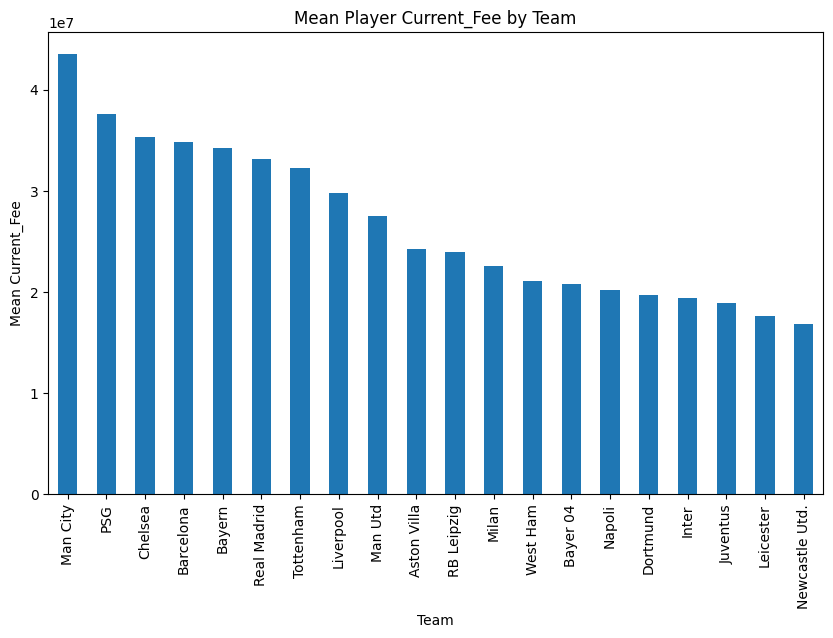

In [37]:
groupby_plot(df, 'Team', 'Current_Fee')

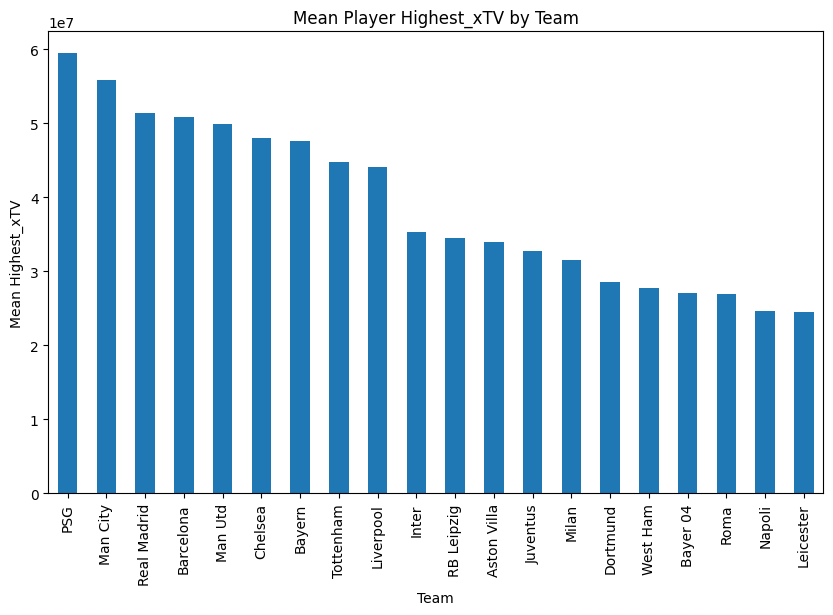

In [38]:
groupby_plot(df, 'Team', 'Highest_xTV')

In [39]:
df.head()

,Unnamed: 0,Name,Age,Nationality,Height,Weight,Team,Skill,Pot,Current_Fee,...,Offsides,Ball_Recoveries,Ball_Recoveries_Opponent,Challenges,Air_Challenges,Tackles,Ball_Interceptions,Lost_Balls,Lost_Balls_Own,Errors_to_Goal
0,0,Kylian Mbappé,24,FRA,178.0,75.0,PSG,90.2,99.5,136000000.0,...,42,25,12,631.0,27,32,28,413,33,0
1,1,Erling Haaland,22,NOR,195.0,88.0,Man City,92.0,100.0,133600000.0,...,11,22,14,482.0,170,27,39,243,42,1
2,2,Vinicius Junior,22,BRA,176.0,73.0,Real Madrid,82.7,94.9,113800000.0,...,27,50,26,883.0,31,101,53,501,55,1
3,3,Phil Foden,23,ENG,171.0,70.0,Man City,91.1,100.0,103700000.0,...,8,45,13,341.0,58,41,58,192,23,0
4,4,Jude Bellingham,19,ENG,186.0,75.0,Dortmund,71.8,98.3,100000000.0,...,3,140,57,774.0,117,126,196,325,58,3


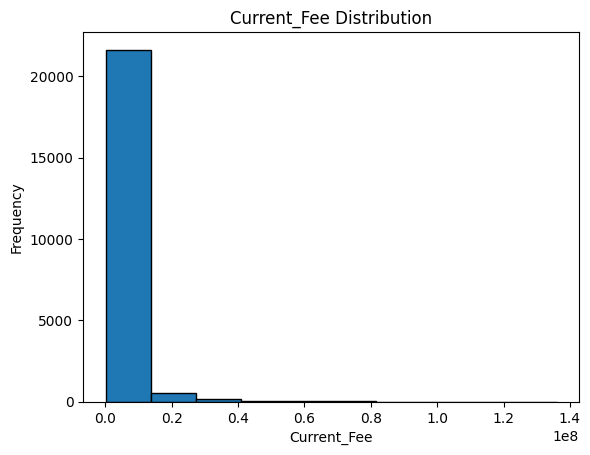

In [41]:
plot_dist(df, 'Current_Fee')

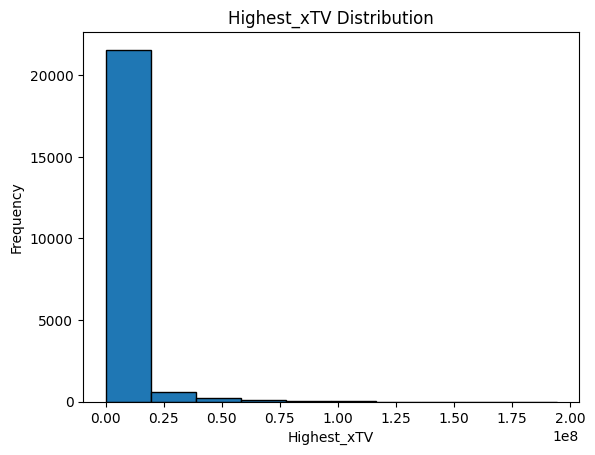

In [42]:
plot_dist(df, 'Highest_xTV')

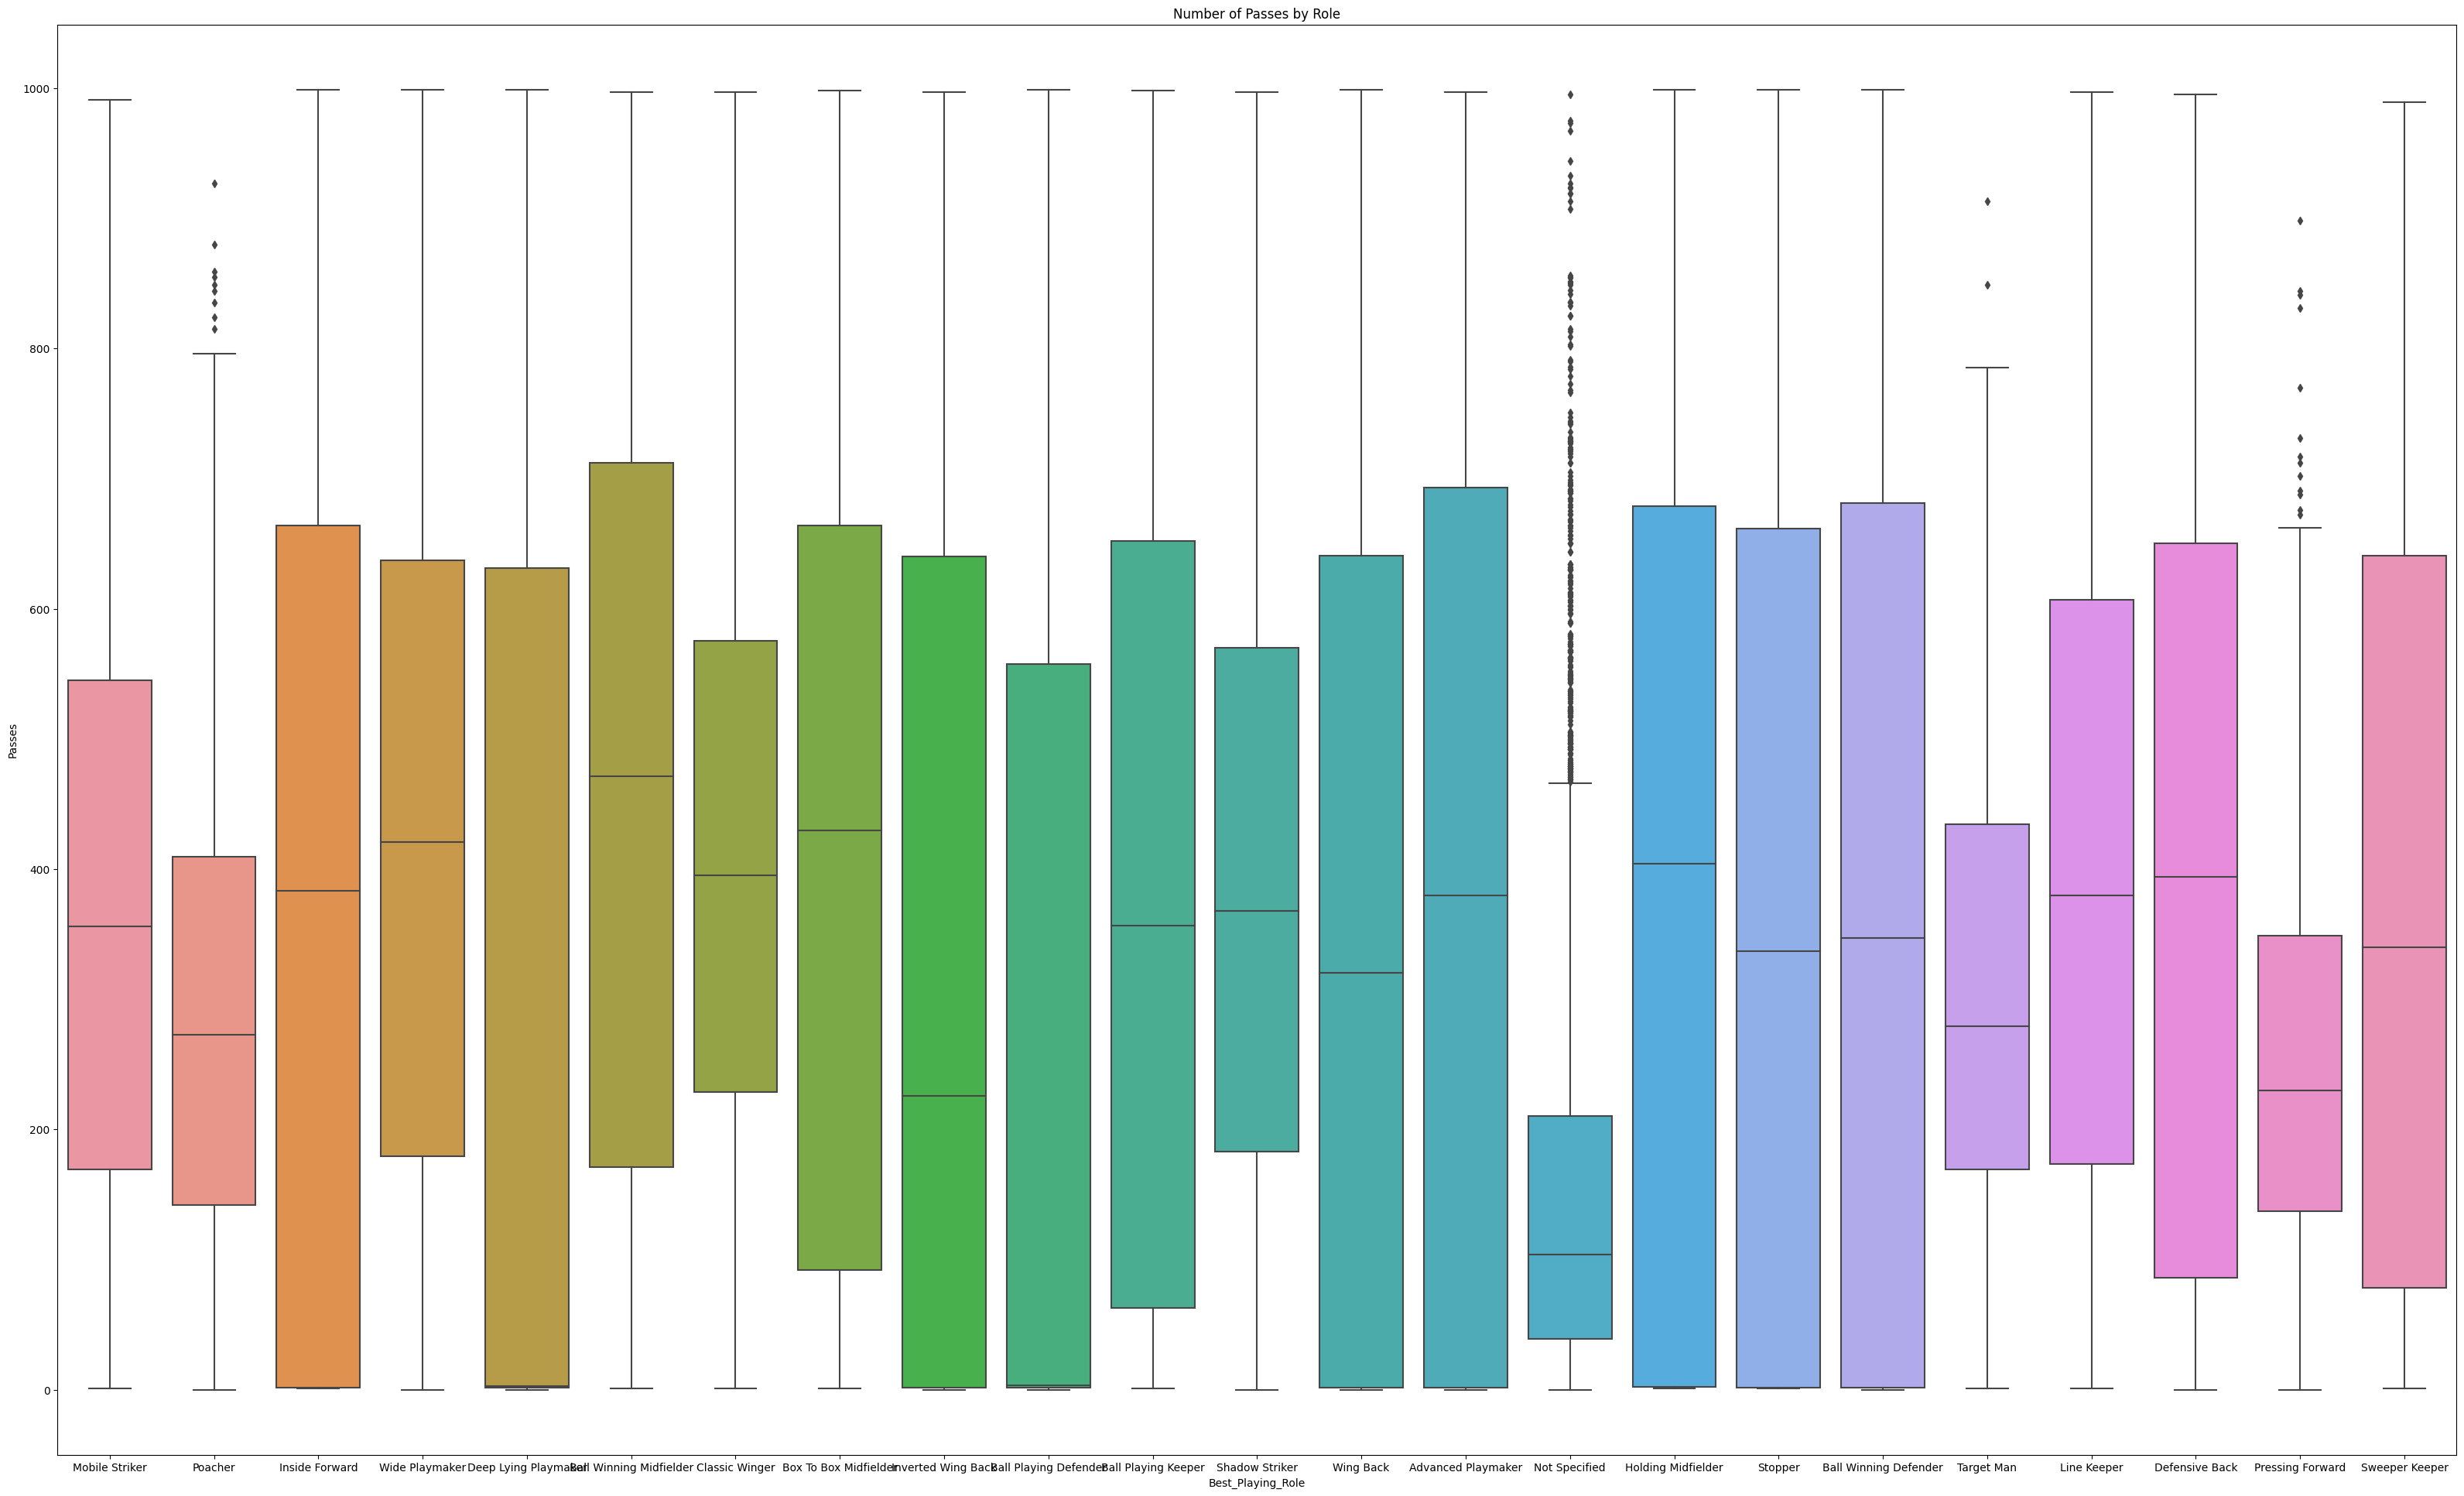

In [43]:
plt.figure(figsize=(40, 24))
sns.boxplot(x='Best_Playing_Role', y='Passes', data=df)
plt.title('Number of Passes by Role')
plt.show()

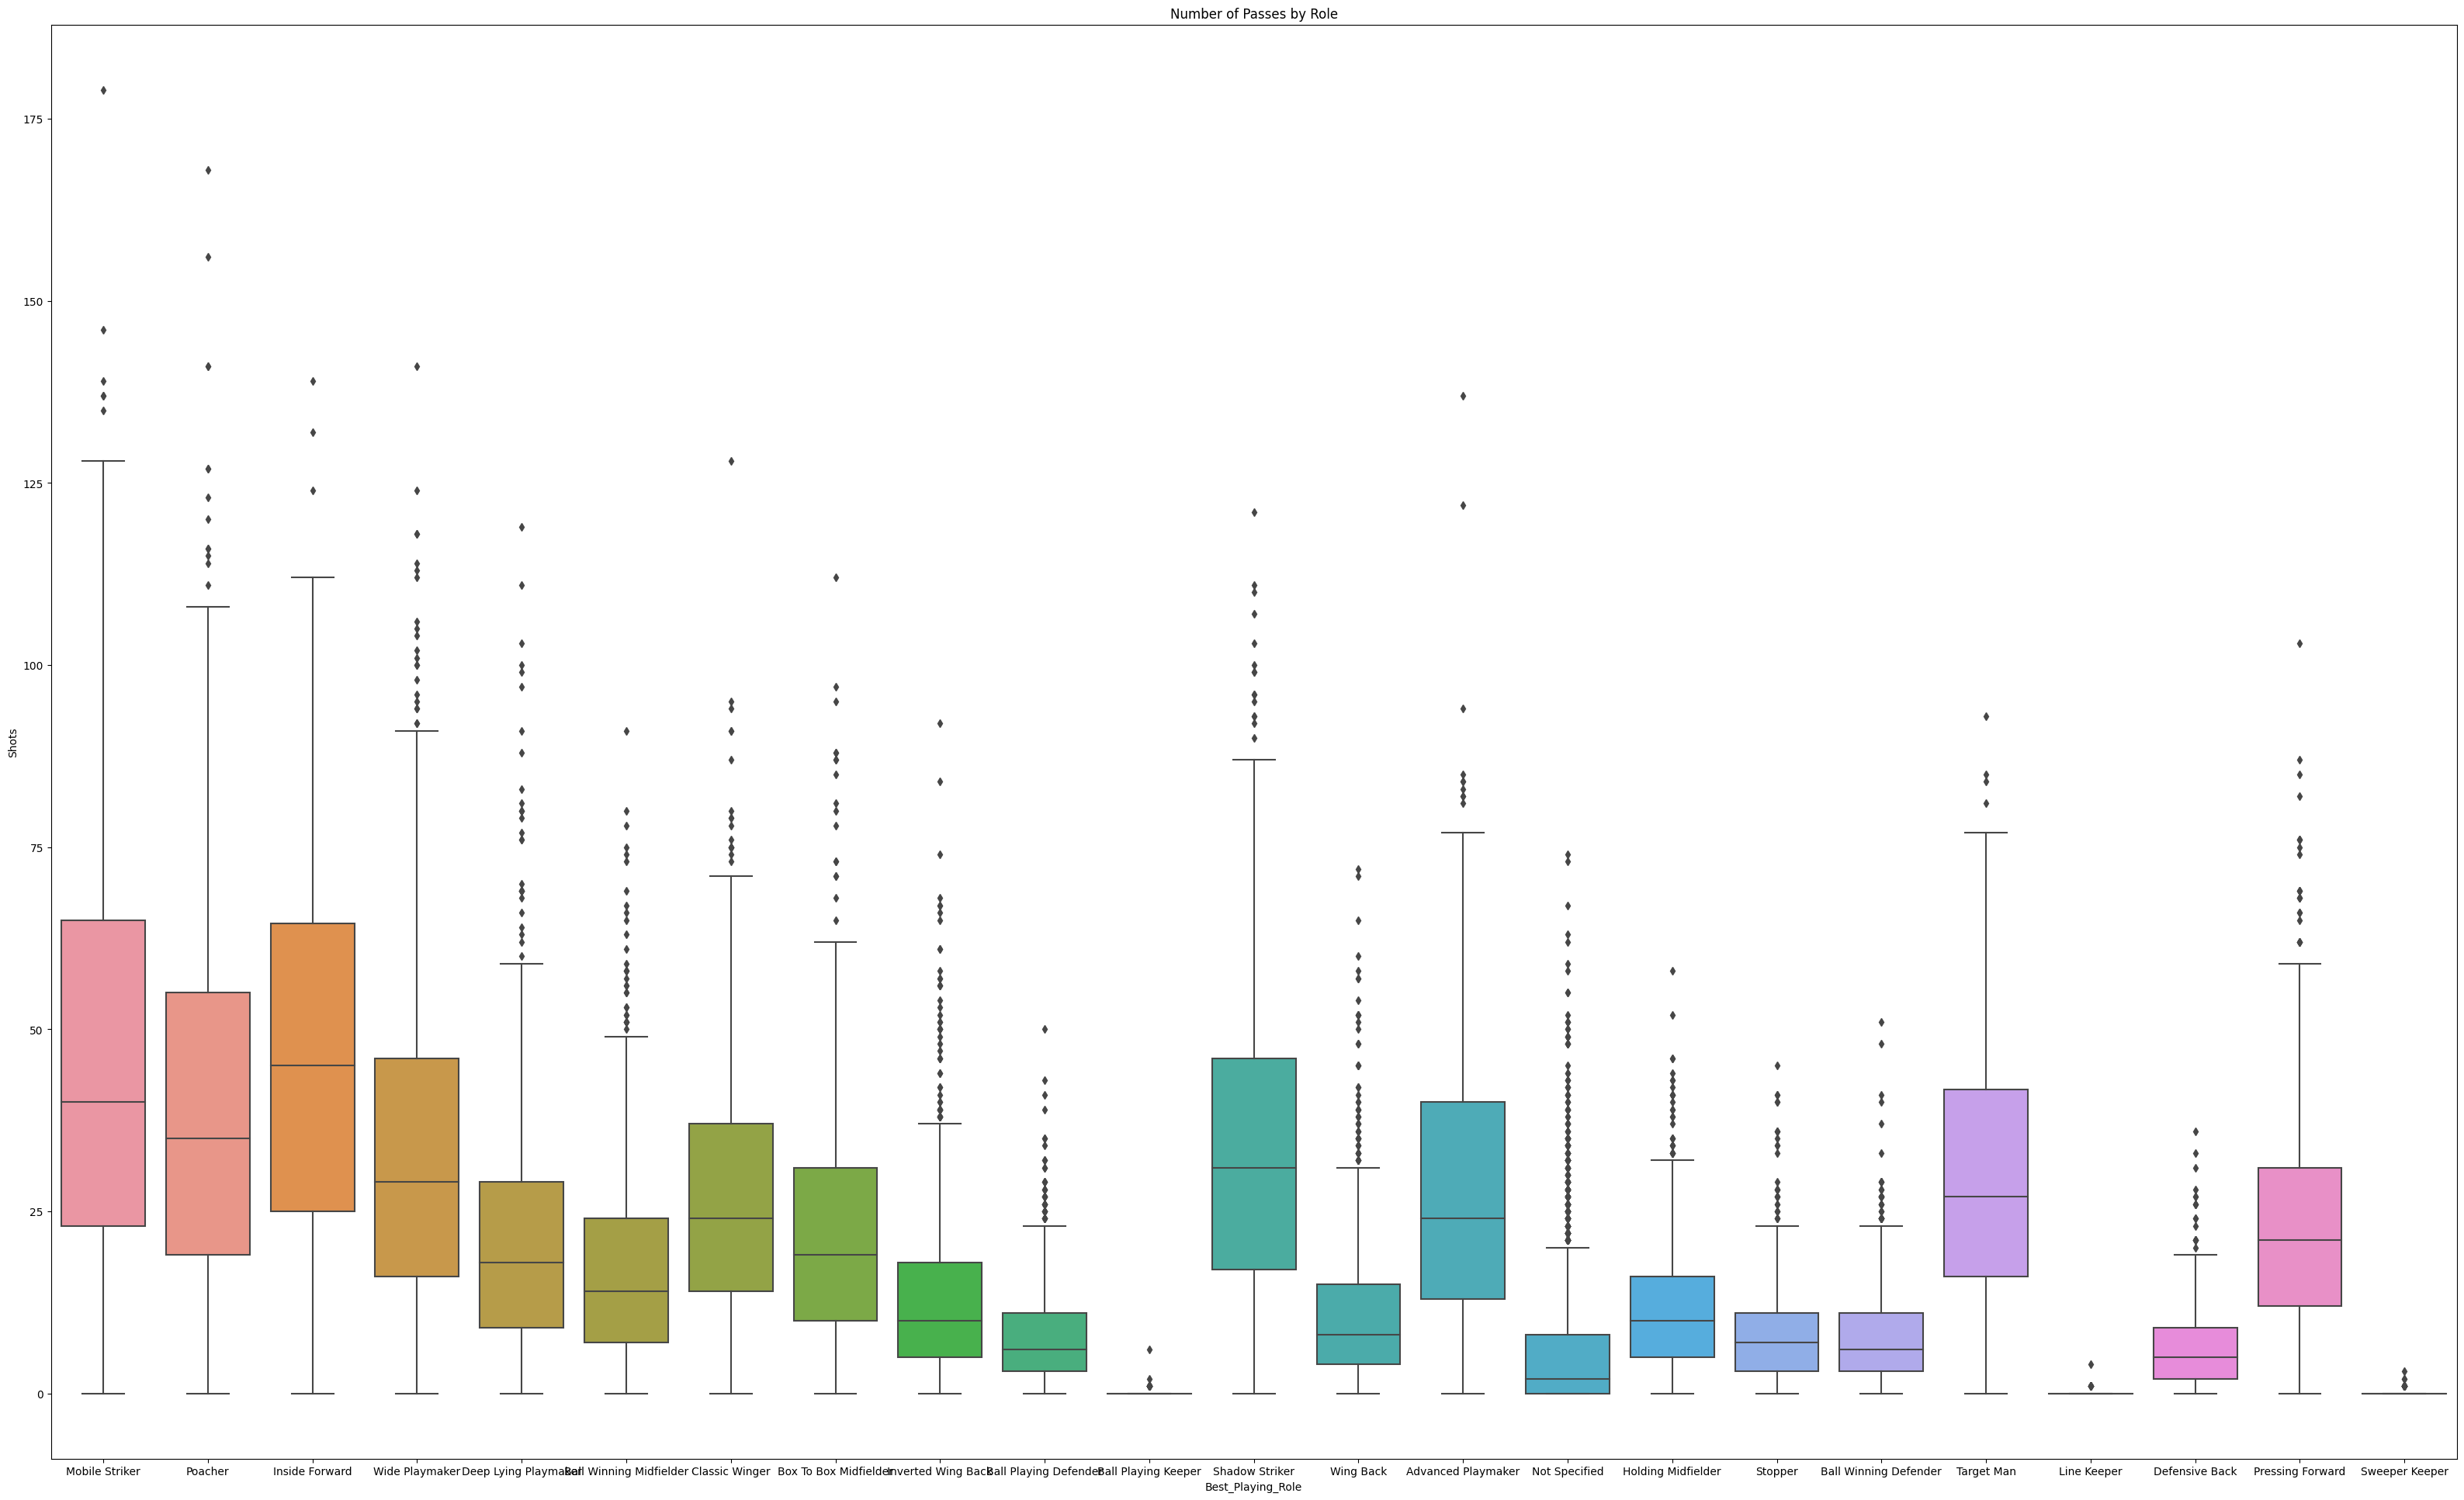

In [44]:
plt.figure(figsize=(40, 24))
sns.boxplot(x='Best_Playing_Role', y='Shots', data=df)
plt.title('Number of Shots by Role')
plt.show()

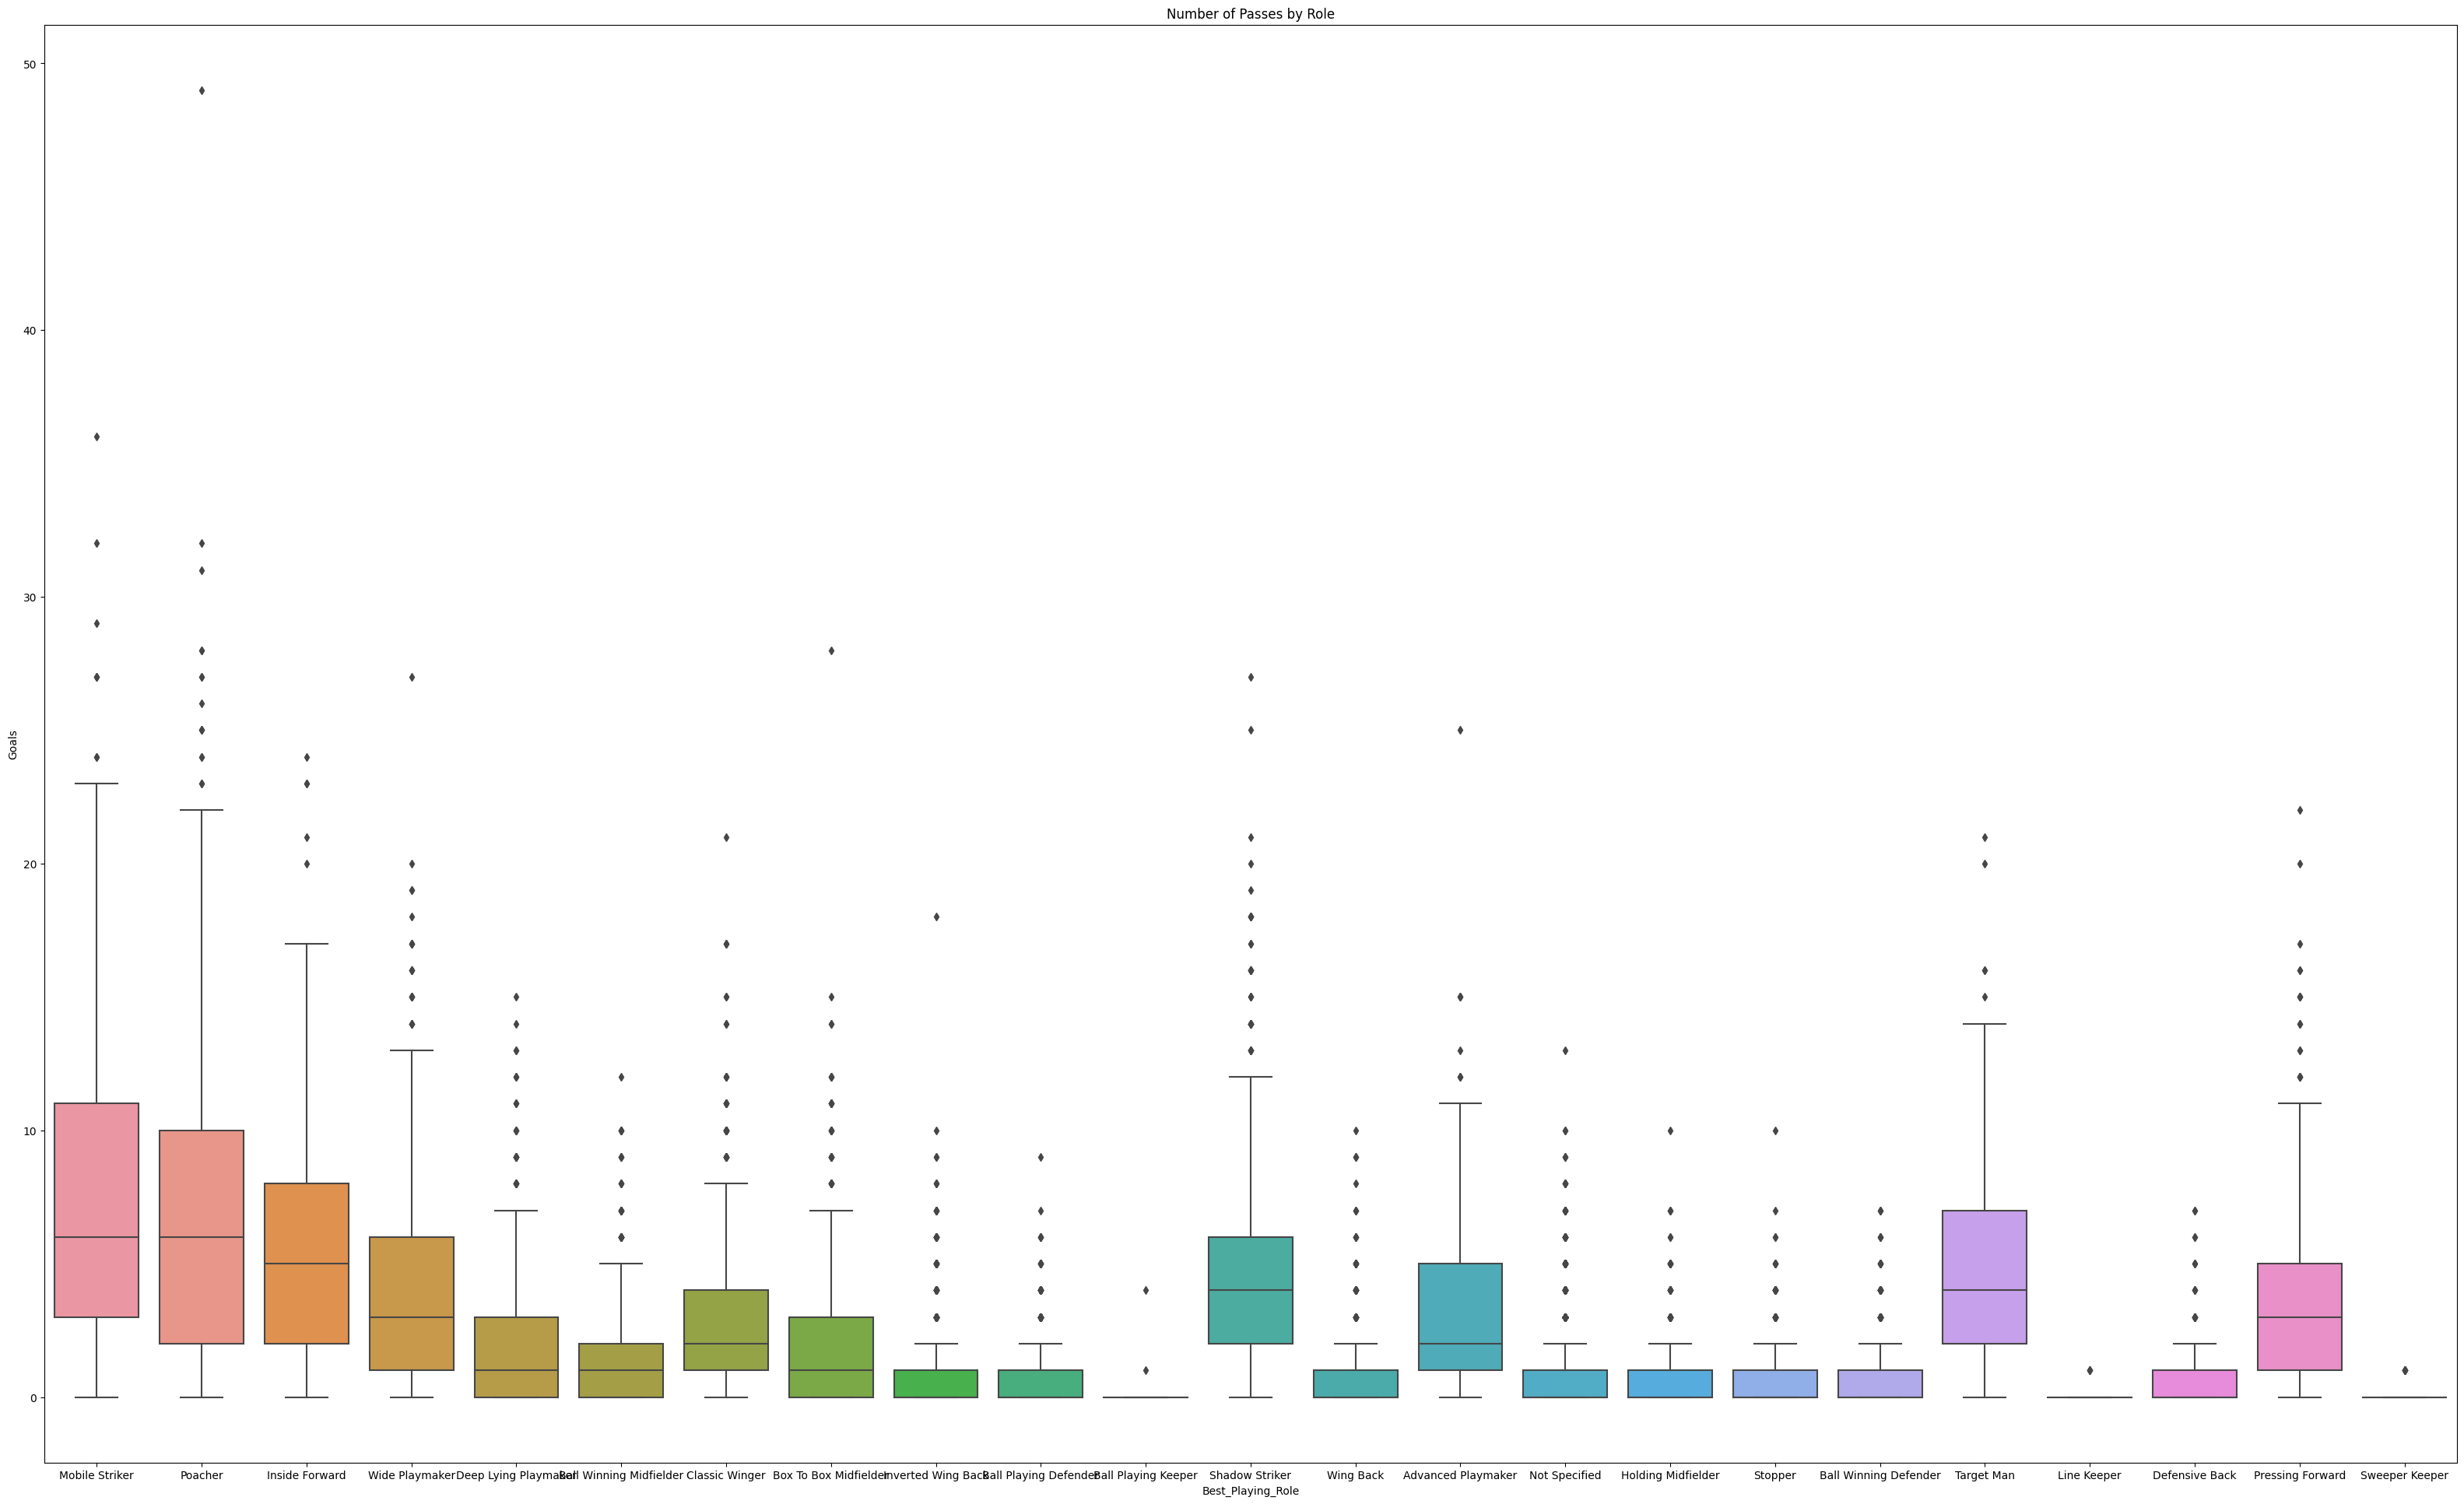

In [45]:
plt.figure(figsize=(40, 24))
sns.boxplot(x='Best_Playing_Role', y='Goals', data=df)
plt.title('Number of Goals by Role')
plt.show()

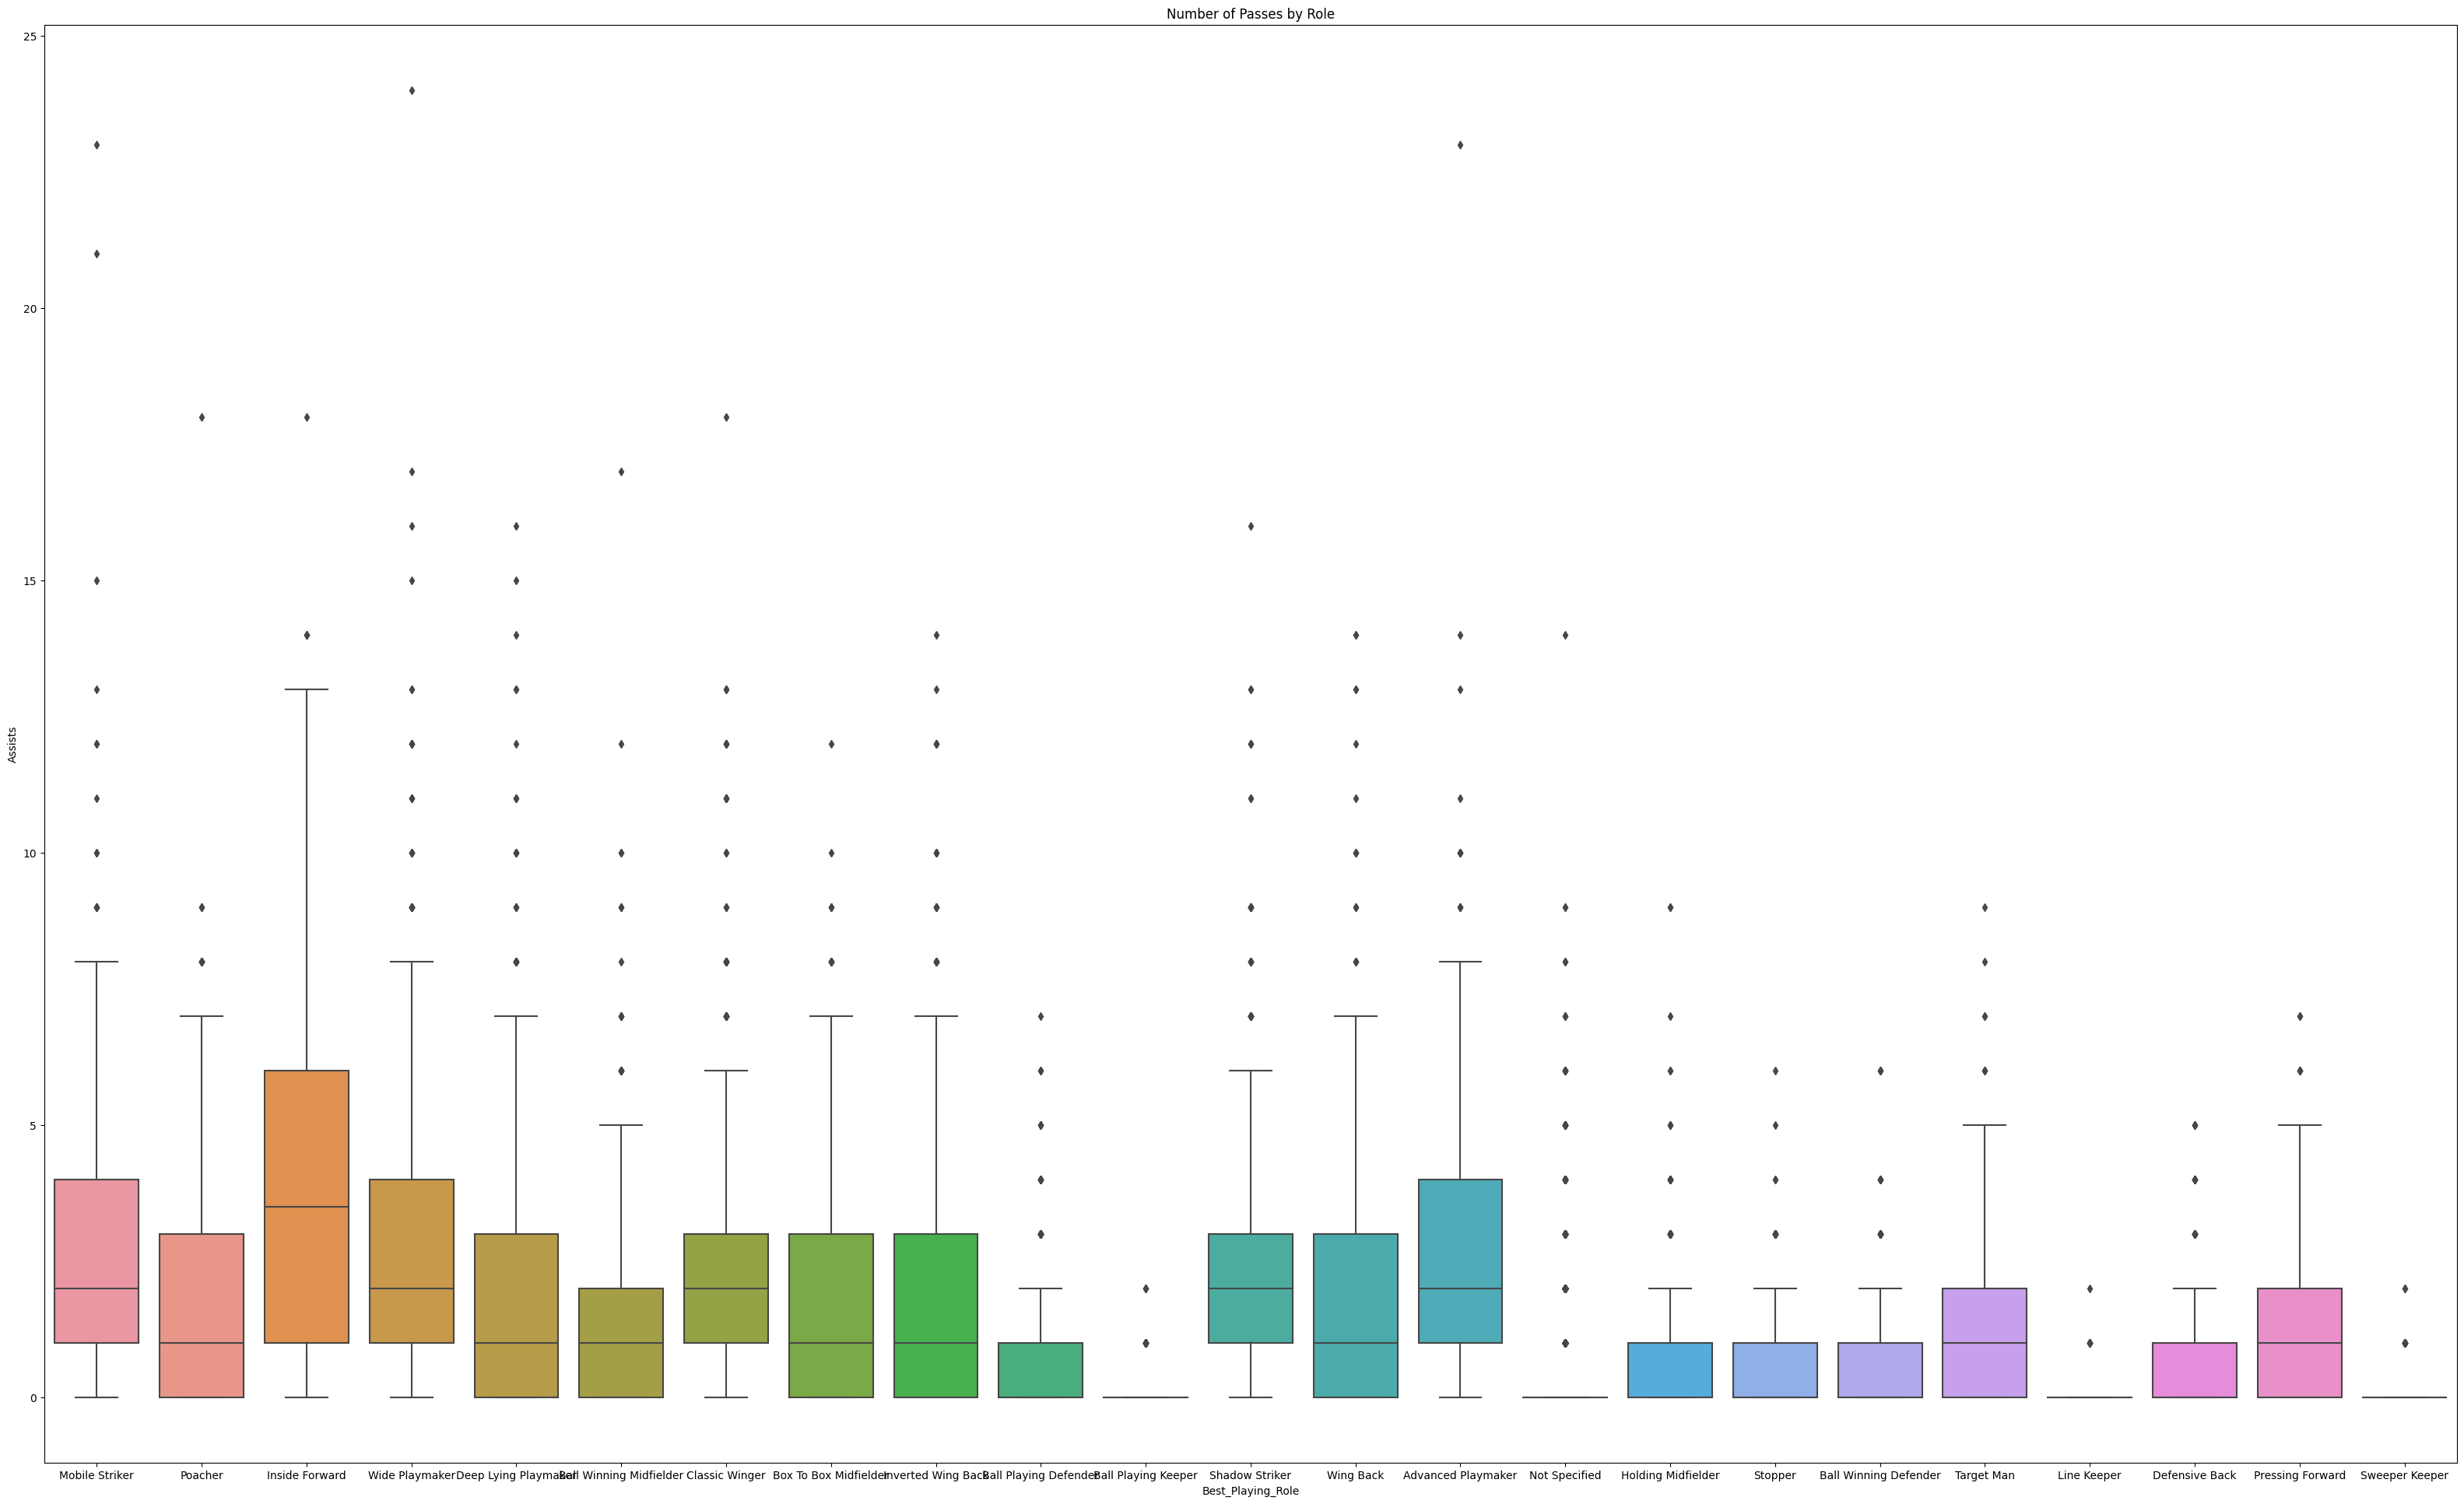

In [46]:
plt.figure(figsize=(40, 24))
sns.boxplot(x='Best_Playing_Role', y='Assists', data=df)
plt.title('Number of Assists by Role')
plt.show()

C:\Users\bardd\AppData\Local\Temp\ipykernel_6964\1731997018.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


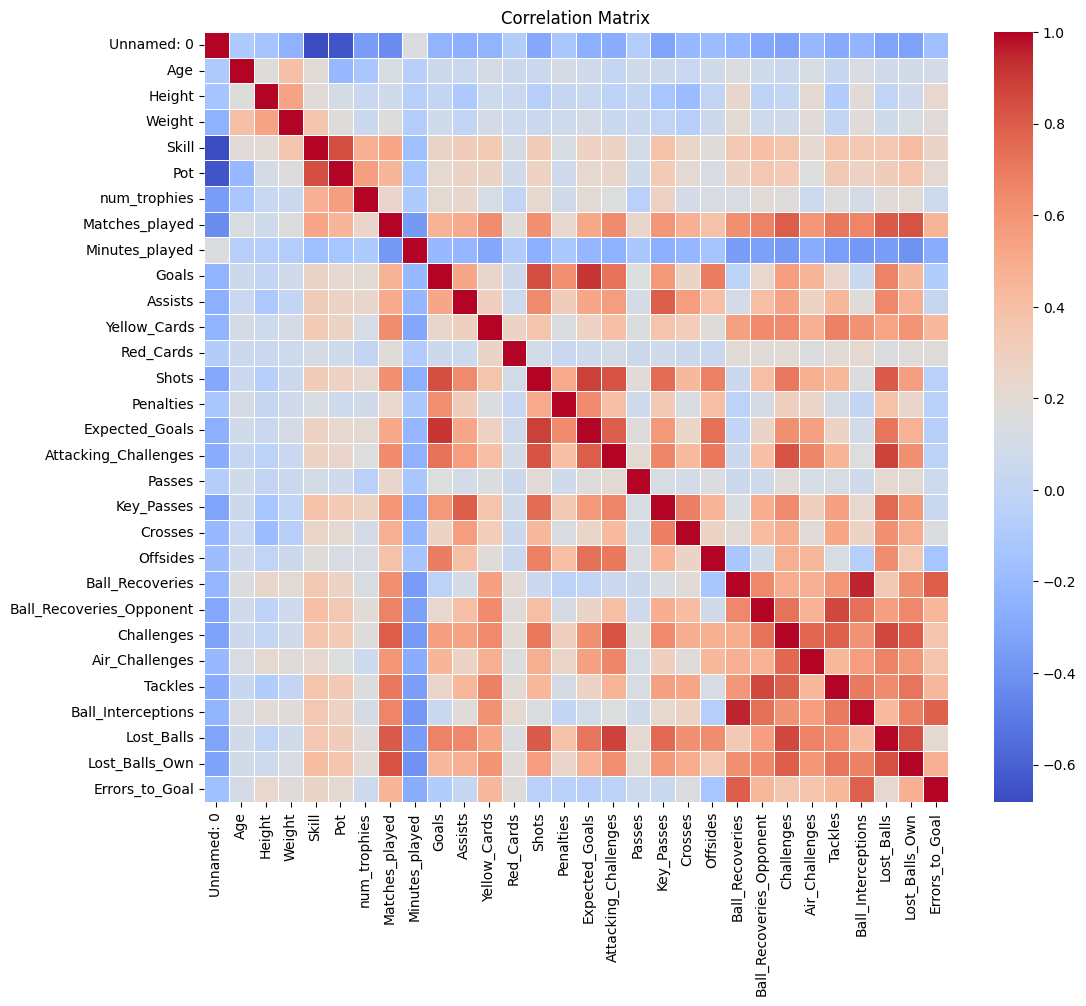

In [47]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [48]:
correlation_threshold = 0.8

# Find highly correlated columns
highly_correlated_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_cols.add(colname)

In [49]:
# Helps to decide if to apply L1, L2 Regularization
highly_correlated_cols

{'Attacking_Challenges',
 'Ball_Interceptions',
 'Challenges',
 'Expected_Goals',
 'Lost_Balls',
 'Lost_Balls_Own',
 'Pot',
 'Shots',
 'Tackles'}

In [50]:
# Season is the same for all examples, name is unique.
df = df.drop([ 'Unnamed: 0', 'Name', 'Season'], axis=1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22469 entries, 0 to 22952
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       22469 non-null  int64  
 1   Nationality               22469 non-null  object 
 2   Height                    22469 non-null  float64
 3   Weight                    22469 non-null  float64
 4   Team                      22469 non-null  object 
 5   Skill                     22469 non-null  float64
 6   Pot                       22469 non-null  float64
 7   Current_Fee               22469 non-null  object 
 8   Highest_xTV               22469 non-null  object 
 9   num_trophies              22469 non-null  int64  
 10  Preferred_foot            22469 non-null  object 
 11  Best_Playing_Role         22469 non-null  object 
 12  Matches_played            22469 non-null  int64  
 13  Minutes_played            22469 non-null  float64
 14  Goals 

In [52]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22469 entries, 0 to 22952
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                22469 non-null  int64  
 1   Name                      22469 non-null  object 
 2   Age                       22469 non-null  int64  
 3   Nationality               22469 non-null  object 
 4   Height                    22469 non-null  int64  
 5   Weight                    22469 non-null  int64  
 6   Team                      22469 non-null  object 
 7   Skill                     22469 non-null  float64
 8   Pot                       22469 non-null  float64
 9   Current_Fee               22469 non-null  object 
 10  Highest_xTV               22469 non-null  object 
 11  num_trophies              22469 non-null  int64  
 12  Preferred_foot            22469 non-null  object 
 13  Best_Playing_Role         22469 non-null  object 
 14  Season

In [53]:
# Return the Nones because XGBoost can handle none values better.
df['Best_Playing_Role'] = df['Best_Playing_Role'].replace('Not Specified', np.NaN)
df['Preferred_foot'] = df['Preferred_foot'].replace('Not Specified', np.NaN)
df['Height'] = copy['Height'].replace(0, np.NaN)
df['Weight'] = copy['Weight'].replace(0, np.NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22469 entries, 0 to 22952
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       22469 non-null  int64  
 1   Nationality               22469 non-null  object 
 2   Height                    20549 non-null  float64
 3   Weight                    16547 non-null  float64
 4   Team                      22469 non-null  object 
 5   Skill                     22469 non-null  float64
 6   Pot                       22469 non-null  float64
 7   Current_Fee               22469 non-null  object 
 8   Highest_xTV               22469 non-null  object 
 9   num_trophies              22469 non-null  int64  
 10  Preferred_foot            19756 non-null  object 
 11  Best_Playing_Role         16335 non-null  object 
 12  Matches_played            22469 non-null  int64  
 13  Minutes_played            22469 non-null  float64
 14  Goals 

In [54]:
df.to_csv('processed_player_data.csv')